<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/matplotlib_nn_weights_and_biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 24.90 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [2]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

(784, 1)
(28, 28)


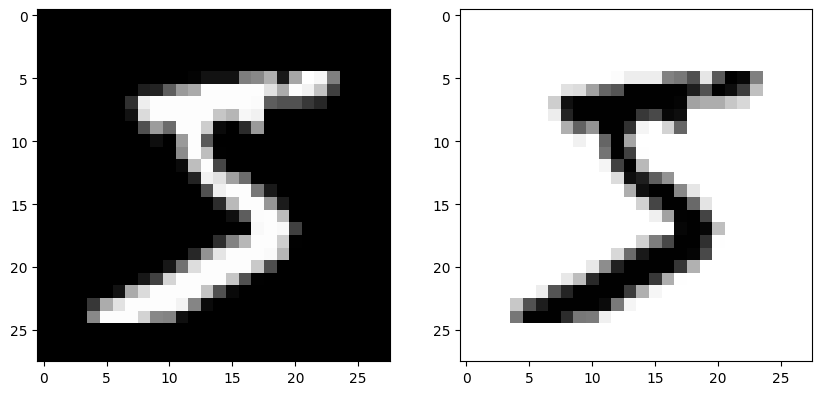

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(np.shape(training_data[0][0]))

# reshape the training_img so that it's a 2d 28x28 image instead of a flat 784 pixel line
training_img_0 = np.reshape(training_data[0][0], (28,28))
print(np.shape(training_img_0))

# setup our figure area size
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot using the normal grayscale mapping to see the true nature of the input training data
# in the left column of our figure
axs[0].imshow(training_img_0, cmap='gray', vmin=0, vmax=1)

# now use the "reverse" color map "gray_r" to display it the way humans expect this kind of data to look like
axs[1].imshow(training_img_0, cmap='gray_r', vmin=0, vmax=1)


In [8]:
import numpy as np
np.set_printoptions(linewidth=5000)

# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 5 so we don't have to wait as long
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
original_weights = net.weights

# print the shape of the connections between the input layer and the hidden layer
print(np.shape(original_weights[0]))

# print the shape of the connections between the hidden layer and the output layer
print(np.shape(original_weights[1]))

# now let's look at ALL 784 incoming connections to the first neuron in the hidden layer
print(np.shape(original_weights[0][0]))
print(original_weights[0][0])

# now let's look at ALL 30 incoming connections to the first neuron in the output layer
print(original_weights[1][0])
print(np.shape(original_weights[1][0]))

test_output = net.feedforward(test_data[0][0])
print(test_output)
print(test_data[0][1])

(30, 784)
(10, 30)
(784,)
[-1.29571244e+00  8.92366542e-01  3.38655162e-01 -8.38964445e-01 -3.78058956e-01  1.69196181e+00 -1.19082102e+00  9.21810131e-01  7.94332894e-01  1.46569187e-01  1.08112332e-02  5.71120902e-01  1.82216921e+00 -1.45342502e+00  6.41019014e-01  6.82743454e-02  3.16899255e-01 -8.43356213e-01 -9.88221984e-01  2.09789743e+00 -7.62095124e-01  9.48823914e-01 -1.12487497e+00  1.14019457e+00  8.46154524e-01  2.06416878e-01 -6.12955608e-01  7.39628122e-01  7.26293424e-01 -1.14365801e+00  4.16554433e-01  2.61917180e-01  7.81547073e-01 -3.22654912e-01 -1.59784005e+00 -5.03946108e-01 -7.42402159e-02 -1.30633114e+00  1.18283995e-01  9.27773499e-01  3.30538424e-01  1.51463406e+00 -7.84067435e-02 -8.37400391e-01 -1.49039862e-01 -8.43302819e-01  8.99491433e-02 -5.91505192e-01  1.01524569e+00 -8.96390803e-02 -1.58894623e-01  2.36834021e-01 -8.11080359e-02 -7.26034436e-01  2.20213596e+00 -2.34809786e-01 -4.49139229e-01  1.95104807e+00 -2.97826390e-01 -1.35415837e+00  7.99936388e-

In [9]:
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
# now let's look at ALL 784 incoming connections to the first neuron in the hidden layer
print(np.shape(net.weights[0][0]))
print(net.weights[0][0])

# now let's look at ALL 30 incoming connections to the first neuron in the output layer
print(net.weights[1][0])
print(np.shape(net.weights[1][0]))



Epoch 0 : 7078 / 10000
Epoch 1 : 8291 / 10000
Epoch 2 : 8351 / 10000
Epoch 3 : 8434 / 10000
Epoch 4 : 8480 / 10000
(784,)
[-1.29571244  0.89236654  0.33865516 -0.83896444 -0.37805896  1.69196181 -1.19082102  0.92181013  0.79433289  0.14656919  0.01081123  0.5711209   1.82284506 -1.45194514  0.64101901  0.06827435  0.31689926 -0.84335621 -0.98822198  2.09789743 -0.76209512  0.94882391 -1.12487497  1.14019457  0.84615452  0.20641688 -0.61295561  0.73962812  0.72629342 -1.14365801  0.41655443  0.26191718  0.781547   -0.32265507 -1.59774623 -0.50368498 -0.06901244 -1.3036408   0.12683631  0.935156    0.33080052  1.51257231 -0.07998969 -0.84640151 -0.14096792 -0.84405277  0.09155142 -0.59136326  1.01591334 -0.08783156 -0.15874472  0.23683417 -0.08110804 -0.72603444  2.20213596 -0.23480979 -0.44913923  1.95104807 -0.29782639 -1.35415837  0.79993642  1.32281992 -0.84639752 -0.28403835 -0.64970173  1.53515702  0.76540214  0.09456339  1.18630224 -1.82263549 -0.40651948 -0.28152481  1.61066581  

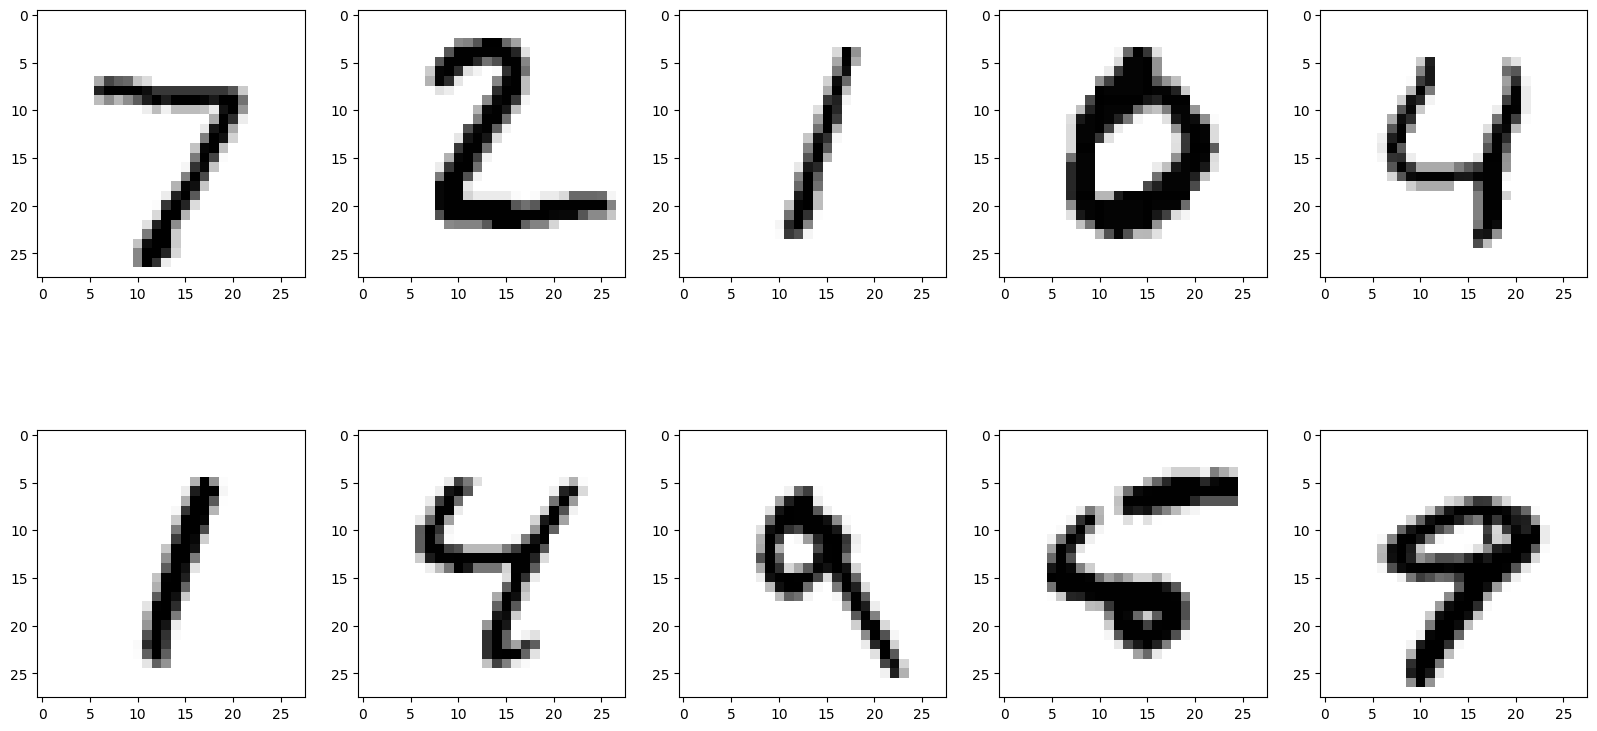

[array([[6.04187366e-05],
       [7.75547930e-06],
       [1.78002888e-05],
       [2.91628514e-05],
       [2.75077622e-07],
       [6.98745088e-06],
       [3.33531396e-10],
       [9.99405259e-01],
       [1.16051545e-07],
       [8.65563754e-03]]), 7, 7]
[array([[8.63231930e-07],
       [3.25930804e-03],
       [8.33484404e-01],
       [6.28287678e-04],
       [1.98984992e-09],
       [1.60104264e-02],
       [3.68265076e-02],
       [1.87947240e-07],
       [6.77566213e-05],
       [8.36148076e-08]]), 2, 2]
[array([[3.75200740e-06],
       [9.91881586e-01],
       [1.24607771e-03],
       [1.03403187e-04],
       [2.20502288e-06],
       [1.55664198e-04],
       [2.14571459e-03],
       [1.78649375e-02],
       [6.45075043e-04],
       [2.28183065e-04]]), 1, 1]
[array([[2.56058320e-05],
       [3.98137763e-06],
       [1.28714401e-06],
       [4.97583519e-02],
       [3.43178995e-06],
       [2.13983879e-04],
       [5.50237677e-04],
       [9.01591945e-05],
       [2.05050276e-05

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 5, figsize=(20,10))
i = 0
for r in range(2):
  for c in range(5):
    test_img = np.reshape(test_data[i][0], (28,28))
    axs[r][c].imshow(test_img, cmap='gray_r', vmin=0, vmax=1)
    i += 1
plt.show()

for i in range(10):
  a = net.feedforward(test_data[i][0])
  print([a, np.argmax(a), test_data[i][1]])

[-1.29571244e+00  8.92366542e-01  3.38655162e-01 -8.38964445e-01 -3.78058956e-01  1.69196181e+00 -1.19082102e+00  9.21810131e-01  7.94332894e-01  1.46569187e-01  1.08112332e-02  5.71120902e-01  1.82216921e+00 -1.45342502e+00  6.41019014e-01  6.82743454e-02  3.16899255e-01 -8.43356213e-01 -9.88221984e-01  2.09789743e+00 -7.62095124e-01  9.48823914e-01 -1.12487497e+00  1.14019457e+00  8.46154524e-01  2.06416878e-01 -6.12955608e-01  7.39628122e-01  7.26293424e-01 -1.14365801e+00  4.16554433e-01  2.61917180e-01  7.81547073e-01 -3.22654912e-01 -1.59784005e+00 -5.03946108e-01 -7.42402159e-02 -1.30633114e+00  1.18283995e-01  9.27773499e-01  3.30538424e-01  1.51463406e+00 -7.84067435e-02 -8.37400391e-01 -1.49039862e-01 -8.43302819e-01  8.99491433e-02 -5.91505192e-01  1.01524569e+00 -8.96390803e-02 -1.58894623e-01  2.36834021e-01 -8.11080359e-02 -7.26034436e-01  2.20213596e+00 -2.34809786e-01 -4.49139229e-01  1.95104807e+00 -2.97826390e-01 -1.35415837e+00  7.99936388e-01  1.32281957e+00 -8.4713

Text(0.5, 1.0, 'avg change of all 784 input connections to each hidden neuron')

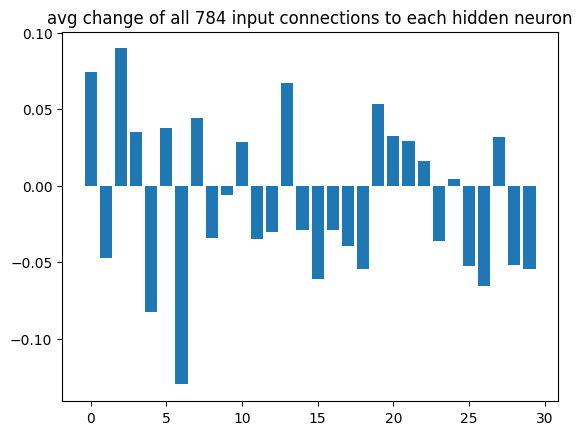

In [33]:
# display the raw untrained weights vs the 5-epoch trained weights ONLY for the incoming connections to the first hidden neuron
print(original_weights[0][0])
print(net.weights[0][0])

# calculate how much all the weights changed between the input layer and each hidden neuron
avgdiffs = [np.average(net.weights[0][i]-original_weights[0][i]) for i in range(30)]
print(avgdiffs)

plt.bar(range(30), avgdiffs)
plt.title("avg change of all 784 input connections to each hidden neuron")


[-1.29571244e+00  8.92366542e-01  3.38655162e-01 -8.38964445e-01 -3.78058956e-01  1.69196181e+00 -1.19082102e+00  9.21810131e-01  7.94332894e-01  1.46569187e-01  1.08112332e-02  5.71120902e-01  1.82216921e+00 -1.45342502e+00  6.41019014e-01  6.82743454e-02  3.16899255e-01 -8.43356213e-01 -9.88221984e-01  2.09789743e+00 -7.62095124e-01  9.48823914e-01 -1.12487497e+00  1.14019457e+00  8.46154524e-01  2.06416878e-01 -6.12955608e-01  7.39628122e-01  7.26293424e-01 -1.14365801e+00  4.16554433e-01  2.61917180e-01  7.81547073e-01 -3.22654912e-01 -1.59784005e+00 -5.03946108e-01 -7.42402159e-02 -1.30633114e+00  1.18283995e-01  9.27773499e-01  3.30538424e-01  1.51463406e+00 -7.84067435e-02 -8.37400391e-01 -1.49039862e-01 -8.43302819e-01  8.99491433e-02 -5.91505192e-01  1.01524569e+00 -8.96390803e-02 -1.58894623e-01  2.36834021e-01 -8.11080359e-02 -7.26034436e-01  2.20213596e+00 -2.34809786e-01 -4.49139229e-01  1.95104807e+00 -2.97826390e-01 -1.35415837e+00  7.99936388e-01  1.32281957e+00 -8.4713

Text(0.5, 1.0, 'raw change of all 784 input connections to the first hidden neuron')

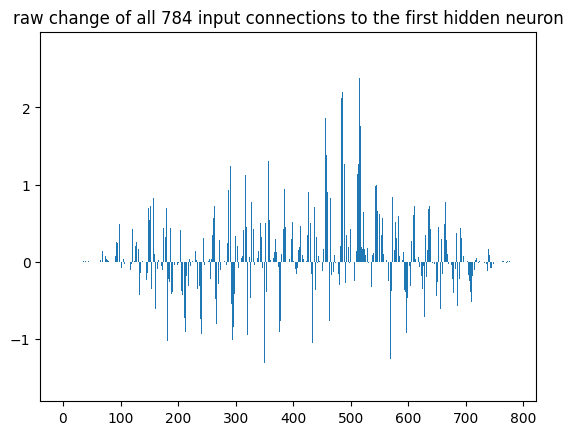

In [36]:
#actual change of all 784 inputs to the first hidden neuron
# display the raw untrained weights vs the 5-epoch trained weights ONLY for the incoming connections to the first hidden neuron
print(original_weights[0][0])
print(net.weights[0][0])

# calculate how much all the weights changed between the input layer and each hidden neuron
avgdiffs = [np.average(net.weights[0][0][i]-original_weights[0][0][i]) for i in range(784)]
print(avgdiffs)

plt.bar(range(784), avgdiffs)
plt.title("raw change of all 784 input connections to the first hidden neuron")


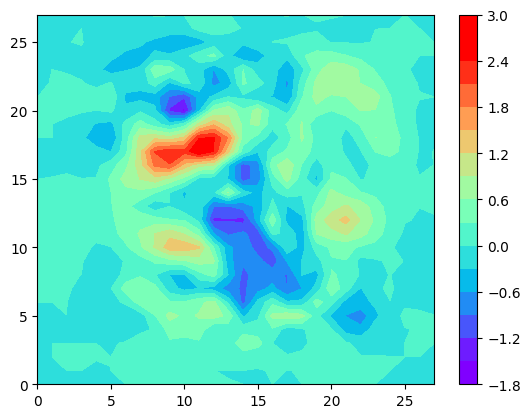

In [39]:
# now let's do this as a heatmap that maintains the 2d nature of the input pixels
xi = range(28)
yi = range(28)
zi = np.reshape(avgdiffs,(28,28))
cs = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=2.5, vmin=-1.5)
plt.colorbar(cs)